In [437]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format
sns.set_theme(style='white', palette='crest', font_scale = 1.2, rc={'figure.figsize': (12, 8)})

### 1. Summary Statistics

In [438]:
def performance_summary(return_data, adj_factor=12):

    ret_summary = {"an_mean": return_data.mean() * adj_factor,
                   "an_volatility": return_data.std() * np.sqrt(adj_factor)}
    ret_summary["an_sharpe"] = (
            ret_summary["an_mean"] / ret_summary["an_volatility"]
    )
    # return  data has column names then match column names with numbers
    try:
        ret_summary = pd.DataFrame(ret_summary, index=return_data.columns)
    except AttributeError:
        ret_summary = pd.Series(ret_summary)

    return ret_summary

### a) Annualized Mean, Volatility, and Sharpe Ratio

In [439]:
# load the excess returns
asset_return = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name ='excess returns', parse_dates=True, index_col=0)
display(asset_return.head())
display(asset_return.shape)

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.0084,-0.0016,0.1550,0.1146,0.1379,-0.0280,0.2956,0.2296,0.0223,0.0988,-0.0185
2009-05-31,0.0541,0.1631,0.1599,0.1324,0.0290,-0.0203,0.0232,0.0544,0.0283,0.0589,0.0204
2009-06-30,0.0045,-0.0269,-0.0231,-0.0146,0.0329,-0.0062,-0.0255,0.0448,-0.0040,-0.0013,0.0014
2009-07-31,0.0313,0.0186,0.1102,0.1004,0.0692,0.0083,0.1058,0.1433,0.0154,0.0746,0.0009
2009-08-31,0.0072,-0.0408,-0.0136,0.0446,-0.0174,0.0072,0.1315,0.0330,-0.0046,0.0365,0.0080


(170, 11)

In [440]:
asset_return.isna().sum()

BWX    0
DBC    0
EEM    0
EFA    0
HYG    0
IEF    0
IYR    0
PSP    0
QAI    0
SPY    0
TIP    0
dtype: int64

In [441]:
summary = pd.DataFrame(index = asset_return.columns.tolist())
adj = 12
summary['annualized_mean'] = np.nanmean(asset_return, axis=0) * adj
summary['annualized_volatility'] = np.nanstd(asset_return, axis=0) * np.sqrt(adj)
summary['annualized_SR'] = summary['annualized_mean']/summary['annualized_volatility']
display(summary)

,annualized_mean,annualized_volatility,annualized_SR
BWX,-0.0002,0.0834,-0.0023
DBC,0.0199,0.1783,0.1114
EEM,0.0641,0.1962,0.3267
EFA,0.0821,0.1660,0.4946
HYG,0.0642,0.0896,0.7168
IEF,0.0172,0.0625,0.2751
IYR,0.1288,0.1877,0.6864
PSP,0.1247,0.2254,0.5534
QAI,0.0175,0.0507,0.3444
SPY,0.1417,0.1477,0.9598


In [442]:
print(f"Asset with the worst annualized Sharpe Ratio: {summary.index[np.argmin(summary.annualized_SR)]}, SR = {summary.annualized_SR.min():.4f}")
print(f"Asset with the best annualized Sharpe Ratio: {summary.index[np.argmax(summary.annualized_SR)]}, SR = {summary.annualized_SR.max():.4f}")

Asset with the worst annualized Sharpe Ratio: BWX, SR = -0.0023
Asset with the best annualized Sharpe Ratio: SPY, SR = 0.9598


## 2. Descriptive Analysis
#### (a) Correlation Matrix of Returns

In [443]:
corr_matrix = asset_return.corr()
np.fill_diagonal(corr_matrix.values, np.nan)
display(corr_matrix)

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,NaN,0.3481,0.6446,0.6184,0.5576,0.4354,0.4510,0.5256,0.6695,0.4632,0.6162
DBC,0.3481,NaN,0.5619,0.5816,0.4745,-0.3190,0.3180,0.4972,0.5432,0.5088,0.1411
EEM,0.6446,0.5619,NaN,0.8507,0.7280,-0.1026,0.6197,0.7833,0.8061,0.7331,0.3025
EFA,0.6184,0.5816,0.8507,NaN,0.7721,-0.1333,0.6955,0.9054,0.8541,0.8713,0.2866
HYG,0.5576,0.4745,0.7280,0.7721,NaN,-0.0079,0.7576,0.8262,0.7712,0.7717,0.3671
IEF,0.4354,-0.3190,-0.1026,-0.1333,-0.0079,NaN,0.0773,-0.1409,0.0645,-0.1533,0.7041
IYR,0.4510,0.3180,0.6197,0.6955,0.7576,0.0773,NaN,0.7614,0.6550,0.7510,0.3997
PSP,0.5256,0.4972,0.7833,0.9054,0.8262,-0.1409,0.7614,NaN,0.8389,0.9009,0.3038
QAI,0.6695,0.5432,0.8061,0.8541,0.7712,0.0645,0.6550,0.8389,NaN,0.8397,0.4682
SPY,0.4632,0.5088,0.7331,0.8713,0.7717,-0.1533,0.7510,0.9009,0.8397,NaN,0.2976


Text(0.5, 1.0, 'Pairwise Correlation between Assets')

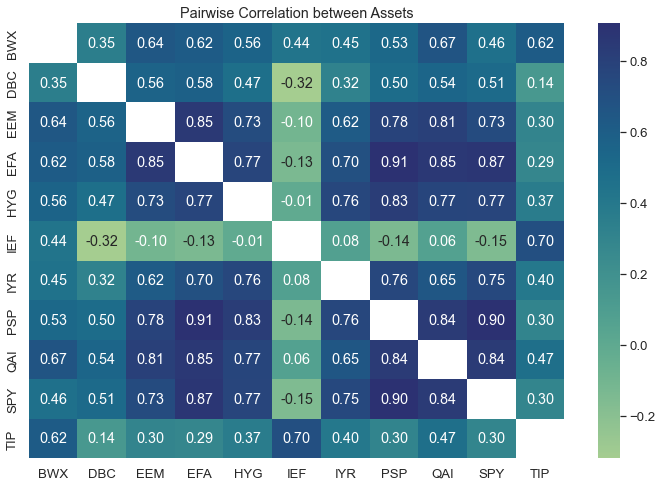

In [444]:
sns.heatmap(corr_matrix, cmap ='crest', annot = True, fmt = ".2f").set_title("Pairwise Correlation between Assets")

In [445]:
corr_matrix.unstack().sort_values(key = abs, ascending = False).drop_duplicates().dropna().head(5)

PSP  EFA   0.9054
SPY  PSP   0.9009
     EFA   0.8713
QAI  EFA   0.8541
EFA  EEM   0.8507
dtype: float64

In [446]:
corr_matrix.unstack().sort_values(key = abs, ascending = False).drop_duplicates().dropna().tail(5)

EFA  IEF   -0.1333
EEM  IEF   -0.1026
IEF  IYR    0.0773
     QAI    0.0645
HYG  IEF   -0.0079
dtype: float64

In [447]:
# Find the pair with the highest correlation
best_idx = np.abs(corr_matrix.stack()).idxmax()
best_val = corr_matrix.loc[best_idx]

# Find the pair with the lowest correlation
worst_idx = np.abs(corr_matrix.stack()).idxmin()
worst_val = corr_matrix.loc[worst_idx]

print(f"Pair with the highest correlation: {best_idx}\tcorrelation coefficient = {best_val:.2f}\nPair with the lowest correlation: {worst_idx}\tcorrelation coefficient = {worst_val:.2f}")

Pair with the highest correlation: ('EFA', 'PSP')	correlation coefficient = 0.91
Pair with the lowest correlation: ('HYG', 'IEF')	correlation coefficient = -0.01


#### (b) How well have TIPS done in our sample? Have they outperformed domestic bonds?

Domestic bonds = IEF
Foreign is BWX.

IEF and BWX are specific Exchange Traded Funds (ETFs) that represent the performance of segments of the bond market.

IEF, the iShares 7-10 Year Treasury Bond ETF, tracks the investment results of an index composed of U.S. Treasury bonds with remaining maturities between seven and ten years. Therefore, it's a good representation of domestic (U.S.) bonds because it reflects the performance of U.S. government securities over a specific period.

On the other hand, BWX, the SPDR Bloomberg Barclays International Treasury Bond ETF, tracks an index of fixed-rate, local currency government bonds from over 20 countries outside of the U.S. This makes it a suitable representation for foreign bonds in a U.S.-based portfolio, as it provides diversified exposure to non-U.S. sovereign debt.

In [448]:
display(summary)

,annualized_mean,annualized_volatility,annualized_SR
BWX,-0.0002,0.0834,-0.0023
DBC,0.0199,0.1783,0.1114
EEM,0.0641,0.1962,0.3267
EFA,0.0821,0.1660,0.4946
HYG,0.0642,0.0896,0.7168
IEF,0.0172,0.0625,0.2751
IYR,0.1288,0.1877,0.6864
PSP,0.1247,0.2254,0.5534
QAI,0.0175,0.0507,0.3444
SPY,0.1417,0.1477,0.9598


In [449]:
#  TIP across 3 statistics
#  'mean' and 'sharpe' in descending order but 'std' in ascending ordr
summary.loc[:,['annualized_mean', 'annualized_SR']].rank(ascending = False).loc[['TIP', 'IEF', 'BWX']].style.format(int)

,annualized_mean,annualized_SR
TIP,7,6
IEF,10,9
BWX,11,11


In [450]:
display(summary.loc[:,'annualized_volatility'].rank(ascending = True).loc[['TIP', 'IEF', 'BWX']].to_frame().style.format(int))

,annualized_volatility
TIP,2
IEF,3
BWX,4


TIP has a Sharpe ratio that ranked $6_{th}$ highest and a mean that ranked $7_{th}$ highest among the 11, and volatility that was the $2_{nd}$ lowest. It has a higher mean and sharp ratio than IEF and BWX, which is desirable, and lower volatility than IEF and BWX, which is also desirable. Therefore, TIP has outperformed domestic bonds and foreign bonds.

#### (c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

In [451]:
corr_matrix.loc['TIP',['IEF', 'BWX']]

IEF   0.7041
BWX   0.6162
Name: TIP, dtype: float64

The correlation between TIP and IEF and the  between TIP and BWX are relatively high. Therefore, TIP does not seem to expand the investment opportunity set.

## 3. MV frontier

In [452]:
"""
function to compute the weights of the tangency portfolio - maximizes the risk-adjusted return/sharpe ratio
"""

def tangency_portfolio(return_data, cov):
    inv_cov = np.linalg.inv(cov)
    ones = np.ones(return_data.shape)
    weights = inv_cov @ return_data / (ones.T @ inv_cov @ return_data)
    try:
        return pd.DataFrame(weights, index=return_data.index)
    except AttributeError:
        return weights

"""
function to compute the global minimum variance portfolio - minimizes variance without considering mean
"""

def gmv_portfolio(cov):
    try:
        cov_inv = np.linalg.inv(cov)
    except TypeError:
        cov_inv = np.linalg.inv(np.array(cov))

    ones = np.ones(len(cov.index))
    weights = cov_inv @ ones / (ones @ cov_inv @ ones)
    try:
        return pd.DataFrame(weights, index=cov.index)
    except AttributeError:
        return weights

"""
function to compute the weights of the mean-variance portfolio - target-dependent, optimizing the risk-return tradeoff based on a range of potential portfolios
"""

def mv_portfolio(return_data, cov, target=None):

    w_tan = tangency_portfolio(return_data, cov)
    if target is None:
        return w_tan

    w_gmv = gmv_portfolio(cov)
    delta = (target - return_data @ w_gmv) / (return_data @ w_tan - return_data @ w_gmv)
    scaled_weights = delta * w_tan + (1 - delta) * w_gmv
    try:
        return pd.DataFrame(scaled_weights, index=return_data.index)
    except AttributeError:
        return scaled_weights

"""
function to calculate the weights of the equal-weighted portfolio
"""

def equal_weighted_portfolio(return_data, target=None):
    w_eq = np.ones(len(return_data.columns)) / len(return_data.columns)

    if target is not None:
        w_eq = w_eq * (target / (return_data.mean() @ w_eq))

    try:
        w_eq_df = pd.DataFrame(w_eq, index=return_data.columns, columns=["Weight"]).sort_values(
            by="Weight", ascending=False
        )
        return w_eq_df
    except AttributeError:
        return w_eq

"""
function to calculate risk-parity portfolio
"""

def risk_parity_portfolio(return_data, target=None):
    cov = return_data.cov()
    inv_std = 1 / np.sqrt(np.diag(cov))
    w_rp = inv_std / np.sum(inv_std)

    if target is not None:
        w_rp = w_rp * (target / (asset_return.mean() @ w_rp))

    try:
        w_rp_df = pd.DataFrame(w_rp, index=asset_return.columns, columns=["Weight"]).sort_values(
            by="Weight", ascending=False
        )
        return w_rp_df
    except AttributeError:
        return w_rp

### (a) weights of the tangency portfolios: $w^{tan}$.

In [453]:
# compute the covariance matrix
cov_matrix = asset_return.cov()
# compute the mean returns
mean_rets = asset_return.mean()
# compute the weights of the tangency portfolio
W_tan = tangency_portfolio(mean_rets, cov_matrix)
display(W_tan)

,0
BWX,-16.3250
DBC,0.7950
EEM,3.6111
EFA,2.1326
HYG,14.0073
IEF,26.2840
IYR,-4.2629
PSP,-5.9211
QAI,-49.8963
SPY,27.4196


### (b) Mean, volatility, and Sharpe Ratio for the tangency portfolio corresponding to $w^{tan}$.

In [454]:
# compute the portfolio returns
asset_return @ W_tan # the expected return of the portfolio for a particular month,

,0
Date,
2009-04-30,0.7773
2009-05-31,-0.1760
2009-06-30,0.1030
2009-07-31,1.2883
2009-08-31,0.3407
...,...
2023-01-31,0.5172
2023-02-28,-0.7480
2023-03-31,1.8514


### 4 a) Mean Variance Portfolio

In [455]:
display(mv_portfolio(asset_return.mean(), asset_return.cov(), target=0.0075))

,0
BWX,-0.5273
DBC,0.0189
EEM,0.0159
EFA,0.0706
HYG,0.4901
IEF,0.7084
IYR,-0.1189
PSP,-0.2625
QAI,-0.2081
SPY,0.6044


### 4 b) Target Portfolio

In [456]:
target_port = mv_portfolio(asset_return.mean(), asset_return.cov(), target=0.0075)
display(target_port)

,0
BWX,-0.5273
DBC,0.0189
EEM,0.0159
EFA,0.0706
HYG,0.4901
IEF,0.7084
IYR,-0.1189
PSP,-0.2625
QAI,-0.2081
SPY,0.6044


In [457]:
target_rets = asset_return @ target_port
display(target_rets)

,0
Date,
2009-04-30,0.0096
2009-05-31,0.0032
2009-06-30,-0.0009
2009-07-31,0.0244
2009-08-31,-0.0047
...,...
2023-01-31,0.0186
2023-02-28,-0.0222
2023-03-31,0.0512


In [458]:
target_summ = performance_summary(target_rets)
metrics = performance_summary(asset_return).sort_values(
    "an_sharpe", ascending=False
)

display(target_summ.style.format("{:.2f}"))


,an_mean,an_volatility,an_sharpe
0,0.09,0.06,1.51


In [459]:
pd.concat([W_tan, target_port, metrics.an_sharpe], axis=1)

,0,0,an_sharpe
BWX,-16.3250,-0.5273,-0.0022
DBC,0.7950,0.0189,0.1111
EEM,3.6111,0.0159,0.3257
EFA,2.1326,0.0706,0.4931
HYG,14.0073,0.4901,0.7147
IEF,26.2840,0.7084,0.2742
IYR,-4.2629,-0.1189,0.6844
PSP,-5.9211,-0.2625,0.5518
QAI,-49.8963,-0.2081,0.3434
SPY,27.4196,0.6044,0.9570


The portfolio is long on `SPY`, `IEF`, `HYG`, `EEM`, `TIP`, `EFA`, and `DBC` (in descending order of weights), and short on `IYR`, `PSP`, `BWX`, `QAI` (in ascending order of absolute value).

The Portfolio is longest on `SPY` and shortest on `QAI`.

In [460]:
tan_summ = performance_summary(asset_return @ W_tan)
display(tan_summ.style.format("{:.2f}"))

,an_mean,an_volatility,an_sharpe
0,3.58,2.08,1.72


### (d) Does this line up with which assets have the strongest Sharpe ratios?

No. The asset with the highest Sharpe ratio is `SPY`, and the asset with the lowest Sharpe ratio is `BWX`, which seems to support the conclusion. However, it is not the case  for others.

## 5. Simple Portfolios

### (a) Equal-weighted portfolio

Calculate the performance of the equally-weighted portfolio over the sample. Rescale the entire weighting vector to have target mean $\tilde{w} = .01$. Report its mean, volatility, and Sharpe ratio.

In [461]:
# Calculate the equal-weighted portfolio.
W_eq = np.ones(len(asset_return.columns)) / len(asset_return.columns)

In [462]:

# Rescale to fit to target return of 0.0075.
W_eq = W_eq * (0.0075 / (asset_return.mean() @ W_eq))
# Match the weights with the assets.
w_eq_df = pd.DataFrame(W_eq, index=asset_return.columns, columns=["Weight"]).sort_values(
    by="Weight", ascending=False
)
display(w_eq_df)


,Weight
BWX,0.1315
DBC,0.1315
EEM,0.1315
EFA,0.1315
HYG,0.1315
IEF,0.1315
IYR,0.1315
PSP,0.1315
QAI,0.1315
SPY,0.1315


In [463]:

# Calculate the returns of the equal weighted portfolio.
performance_summary(asset_return @ w_eq_df)

,an_mean,an_volatility,an_sharpe
Weight,0.0900,0.1505,0.5980


### (b) Risk parity portfolio

Performance of the "risk-parity" portfolio over the sample. Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample volatility estimate.
$
w^i = \frac{1}{\sigma_i}
$
This will give the weight vector, $w$, but you will need to rescale it to have a target mean of $\tilde{\mu} = .01$.

In [464]:
# compute the covariance matrix
cov_matrix = asset_return.cov()
mean_rets = asset_return.mean()
inv_std = 1 / np.sqrt(np.diag(cov_matrix))
W_rp = inv_std / np.sum(inv_std)
W_rp_df = pd.DataFrame(W_rp, index=asset_return.columns, columns=['Unscaled Weight']).sort_values(
    by="Unscaled Weight", ascending=False)
display(W_rp_df)

,Unscaled Weight
QAI,0.1768
TIP,0.1738
IEF,0.1436
BWX,0.1075
HYG,0.1001
SPY,0.0607
EFA,0.0540
DBC,0.0503
IYR,0.0478
EEM,0.0457


In [465]:
# Again, rescale to fit to target return of 0.0075.
# asset_return.mean() @ w_rp： expected return of the risk parity portfolio.
# 0.0075 / (asset_return.mean() @ w_rp)： the ratio of the target return and the expected return of the risk parity portfolio.
# w_rp * (0.0075 / (asset_return.mean() @ w_rp))： the weights of the risk parity portfolio with the target return.

W_rp = W_rp * (0.0075 / (asset_return.mean() @ W_rp))
W_rp_df = pd.DataFrame(W_rp, index=asset_return.columns, columns=["Scaled Weight"]).sort_values(
    by="Scaled Weight", ascending=False
)
display(W_rp_df)

,Scaled Weight
QAI,0.3591
TIP,0.3531
IEF,0.2917
BWX,0.2185
HYG,0.2033
SPY,0.1234
EFA,0.1097
DBC,0.1022
IYR,0.0971
EEM,0.0929


In [466]:
performance_summary(asset_return @ W_rp_df)


,an_mean,an_volatility,an_sharpe
Scaled Weight,0.0900,0.1492,0.6031


## Compare and contrast the performance of 5 portofolios

In [467]:
# tangency portfolio
W_t = tangency_portfolio(asset_return.mean(), asset_return.cov())
display("tangency portfolio", performance_summary(asset_return @ W_t))

# mean-variance portfolio
W_mv  = mv_portfolio(asset_return.mean(), asset_return.cov(), target=0.0075)
display("mean-variance portfolio", performance_summary(asset_return @ W_mv))

# global minimum variance portfolio
W_gmv = gmv_portfolio(asset_return.cov())
display("global minimum variance portfolio", performance_summary(asset_return @ W_gmv))

# equally-weighted portfolio
W_eq = equal_weighted_portfolio(asset_return, target=0.0075)
display("equally-weighted portfolio", performance_summary(asset_return @ W_eq))


# risk-parity portfolio
W_rp = risk_parity_portfolio(asset_return, target=0.0075)
display("risk-parity portfolio", performance_summary(asset_return @ W_rp))

'tangency portfolio'

,an_mean,an_volatility,an_sharpe
0,3.5806,2.0821,1.7197


'mean-variance portfolio'

,an_mean,an_volatility,an_sharpe
0,0.0900,0.0596,1.5088


'global minimum variance portfolio'

,an_mean,an_volatility,an_sharpe
0,0.0007,0.0294,0.0242


'equally-weighted portfolio'

,an_mean,an_volatility,an_sharpe
Weight,0.0900,0.1505,0.5980


'risk-parity portfolio'

,an_mean,an_volatility,an_sharpe
Weight,0.0900,0.1492,0.6031


### (c) How does these compare to the MV portfolio from problem 2.4?

The results from equally-weighted and risk-parity portfolios are similar to that of the MV frontier.
These portfolios have lower values of the Sharpe-Ratio, meaning they have greater standard deviation or variability.